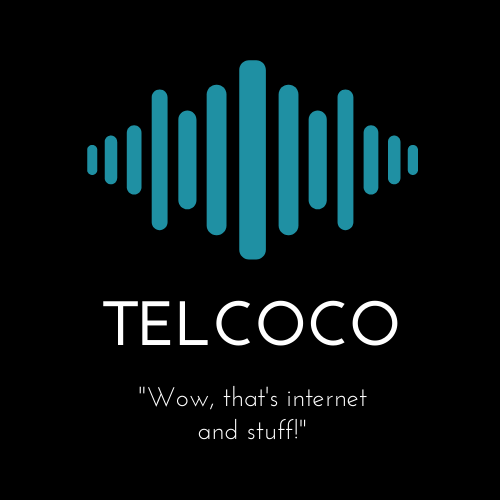

   # Classification Project Part 1 - Report

Caroline Miller

March 21, 2023

O'Neil Data Science Cohort

Goal: Complete the Data Science Pipeline using the telco_churn dataframe, the classification methodology, and Jupyter Notebook to provide effective vizualizations and insights as to why the customers of Telco are leaving the company, and identify key features which may be indicative of churn.

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import env
import scipy.stats as stats

from pydataset import data
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import precision_recall_fscore_support

from sklearn.ensemble import RandomForestClassifier


import evaluation
import acquire
import prepare

### Acquire

In [2]:
unclean_telco = ut = acquire.get_telco_data()

This dataframe is acquired using a function which imports the dataframe from MySQL. 

It joins five additional tables to the customers which results in a dataframe of 7,043 rows and 26 columns. 

Each row represents a telco customer/account, and each column represents a feature pretaining to that account/account holder. 

### Prepare

In [3]:
clean_telco = ct = prepare.prep_telco()

The prepare telco dataframe is wrangled using a function which calls the aqcuire function. The function then cleans and transforms the dataframe. 

The following changes were made to the dataframe:
    
       1. Colummns were dropped: payment_type_id, internet_service_type_id, contract_type_id, customer_id
       2. Boolean values were applied to all possible string values
       3. String values which contained numeric values were changed to int or float
       4. Columns which contained values 3 or less were transformed using pd.get_dummies()
       5. All columns which contained dates were transformed into datetime datatypes
       6. A column was added which contained the difference in date for customers who had churned 
       7. Null values in the churn_month and signup_date columns were filled with 00-00-0000 to represent that these accounts were still active. Note:  the majority of the accounts are still active, so removing them would only provide a dataset of solely customers who have churned.

### Explore

In [5]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   customer_id                           7043 non-null   object         
 1   gender                                7043 non-null   object         
 2   senior_citizen                        7043 non-null   int64          
 3   partner                               7043 non-null   int64          
 4   dependents                            7043 non-null   int64          
 5   tenure                                7043 non-null   int64          
 6   phone_service                         7043 non-null   int64          
 7   multiple_lines                        7043 non-null   int64          
 8   online_security                       7043 non-null   int64          
 9   online_backup                         7043 non-null   int64    